# Geração de Números Aleatórios e Aplicação em Problemas Estatísticos

## Objetivo da Aula:

Nesta aula, vamos introduzir o conceito de números pseudoaleatórios e como eles podem ser usados para resolver problemas estatísticos por meio de simulação. Vamos abordar a importância da aleatoriedade em estatísticas e em algoritmos de Monte Carlo.

## Conteúdo Teórico:

A geração de números aleatórios é essencial em várias áreas da estatística e da ciência de dados. Esses números são utilizados em simulações estocásticas, amostragem e para resolver problemas que envolvem incerteza. Contudo, em computadores, os números "aleatórios" gerados são na verdade pseudoaleatórios, pois seguem uma sequência previsível, gerada por um algoritmo determinístico.

Os números pseudoaleatórios são amplamente usados em algoritmos de Monte Carlo, que dependem da simulação repetida de processos aleatórios para estimar soluções para problemas matemáticos e estatísticos.

## Exemplo de Problema:

Vamos resolver o problema de estimar o valor de π (Pi) usando um método de Monte Carlo. A ideia é simular a área de um quarto de círculo inscrito em um quadrado. Gerando pontos aleatórios dentro do quadrado, podemos calcular a proporção desses pontos que também caem dentro do círculo e usar essa proporção para estimar o valor de Pi.



**Como fazer isso?**

Valor estimado de π: 3.112


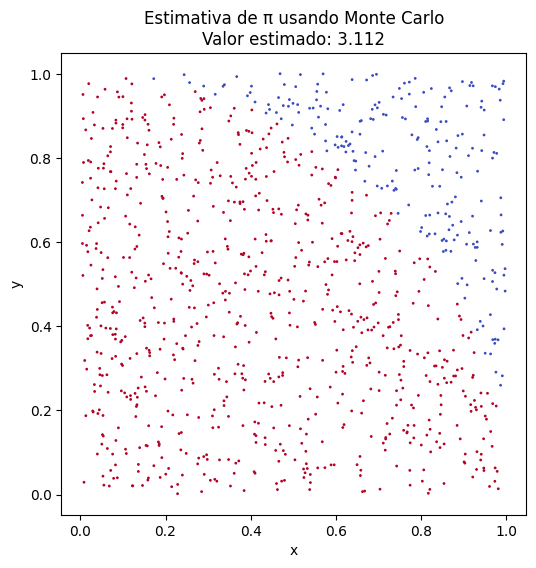

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o número de pontos a serem gerados
n_pontos = 1000

# Gerando pontos aleatórios (x, y) no intervalo [0, 1]
x = np.random.uniform(0, 1, n_pontos)
y = np.random.uniform(0, 1, n_pontos)

# Calculando a distância de cada ponto à origem
distancia = np.sqrt(x**2 + y**2)

# Contando quantos pontos estão dentro do quarto de círculo (distância <= 1)
dentro_circulo = distancia <= 1
pi_estimado = 4 * np.sum(dentro_circulo) / n_pontos

# Exibindo o valor estimado de Pi
print(f"Valor estimado de π: {pi_estimado}")

# Visualizando a distribuição dos pontos
plt.figure(figsize=(6,6))
plt.scatter(x, y, c=dentro_circulo, cmap='coolwarm', s=1)
plt.title(f'Estimativa de π usando Monte Carlo\nValor estimado: {pi_estimado}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exemplo: Simulação de um Jogo de Dados com Dado "Viciado"

Imagine que estamos jogando um jogo em que o dado é "viciado" e não segue uma distribuição uniforme, ou seja, alguns números têm uma chance maior de serem sorteados. Por exemplo, o número 6 pode ter uma probabilidade maior, e os outros números, menores.

Isso nos permite mostrar como alterar a probabilidade de ocorrência de eventos em uma distribuição discreta.

Soma das probabilidades: 1.0
Frequências de cada face após 10000 lançamentos:
Face 1: 0.0509 vezes
Face 2: 0.0956 vezes
Face 3: 0.1541 vezes
Face 4: 0.1955 vezes
Face 5: 0.2583 vezes
Face 6: 0.2456 vezes


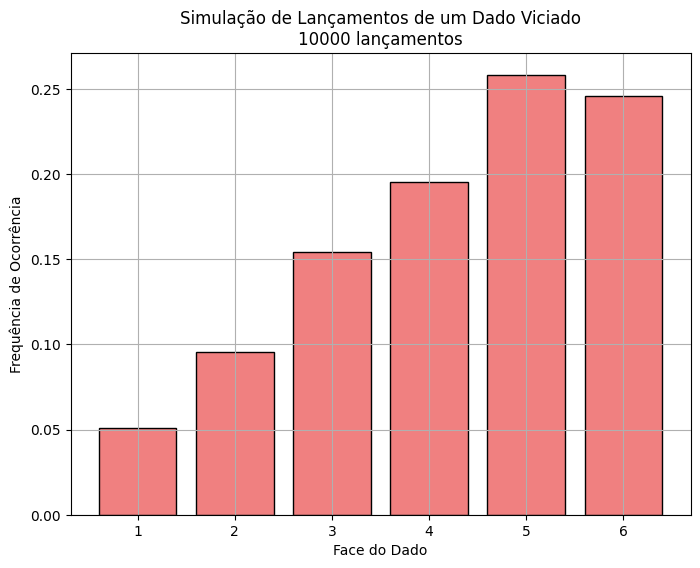

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo as faces do dado e as probabilidades
faces = [1, 2, 3, 4, 5, 6]
probabilidades = [0.05, 0.1, 0.15, 0.2, 0.25, 0.25]  # Probabilidades associadas às faces do dado

# Verificando que a soma das probabilidades é 1
print(f"Soma das probabilidades: {sum(probabilidades)}")

# Simulando 10000 lançamentos de um dado viciado
n_lancamentos = 10000
resultados = np.random.choice(faces, size=n_lancamentos, p=probabilidades)

# Contando as frequências de cada face
frequencias = [np.sum(resultados == face) / n_lancamentos for face in faces]

# Exibindo os resultados da simulação
print(f"Frequências de cada face após {n_lancamentos} lançamentos:")
for face, freq in zip(faces, frequencias):
    print(f"Face {face}: {freq} vezes")

# Visualizando os resultados em um gráfico de barras
plt.figure(figsize=(8,6))
plt.bar(faces, frequencias, color='lightcoral', edgecolor='black')
plt.title(f'Simulação de Lançamentos de um Dado Viciado\n{n_lancamentos} lançamentos')
plt.xlabel('Face do Dado')
plt.ylabel('Frequência de Ocorrência')
plt.grid(True)
plt.show()


## Pergunta: precisamos da função np.random.choice ???

Frequências de cada face após 10000 lançamentos:
Face 1: 0.052 vezes
Face 2: 0.1054 vezes
Face 3: 0.1521 vezes
Face 4: 0.198 vezes
Face 5: 0.2455 vezes
Face 6: 0.247 vezes


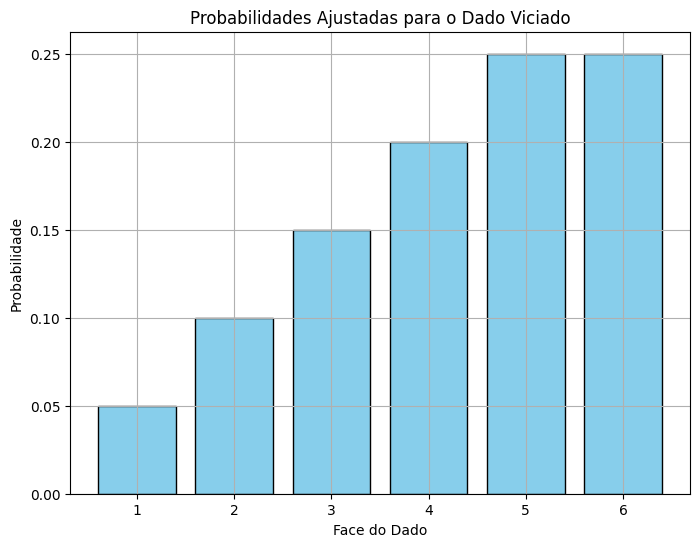

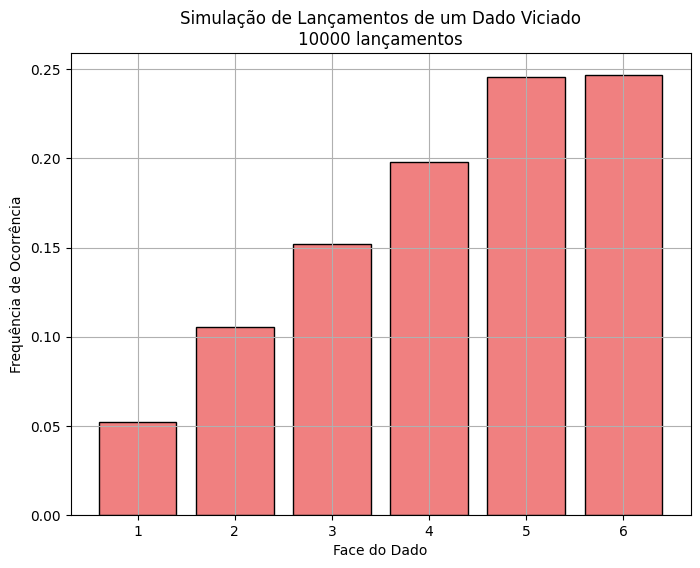

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo as faces do dado e as probabilidades associadas (não uniformes)
faces = [1, 2, 3, 4, 5, 6]
probabilidades = [0.05, 0.1, 0.15, 0.2, 0.25, 0.25]  # Probabilidades associadas às faces do dado

# Gerando um número aleatório e verificando em qual intervalo ele cai
def gerar_amostra_por_intervalos(probabilidades, faces):
    u = np.random.uniform(0, 1)  # Gerando um número aleatório uniforme
    limite_inferior = 0  # Limite inferior do intervalo
    
    # Percorrendo as probabilidades e verificando em qual intervalo o número cai
    for i, p in enumerate(probabilidades):
        limite_superior = limite_inferior + p  # Definindo o limite superior do intervalo
        if limite_inferior <= u < limite_superior:
            return faces[i]  # Retorna a face correspondente ao intervalo
        limite_inferior = limite_superior  # Atualiza o limite inferior para o próximo intervalo

# Simulando lançamentos do dado viciado utilizando a verificação dos intervalos
n_lancamentos = 10000
resultados = [gerar_amostra_por_intervalos(probabilidades, faces) for _ in range(n_lancamentos)]

# Contando as frequências de cada face
frequencias = [np.sum(np.array(resultados) == face) / n_lancamentos for face in faces]

# Exibindo os resultados da simulação
print(f"Frequências de cada face após {n_lancamentos} lançamentos:")
for face, freq in zip(faces, frequencias):
    print(f"Face {face}: {freq} vezes")

# Gráfico das probabilidades ajustadas
plt.figure(figsize=(8,6))
plt.bar(faces, probabilidades, color='skyblue', edgecolor='black')
plt.title('Probabilidades Ajustadas para o Dado Viciado')
plt.xlabel('Face do Dado')
plt.ylabel('Probabilidade')
plt.grid(True)
plt.show()

# Gráfico das frequências obtidas
plt.figure(figsize=(8,6))
plt.bar(faces, frequencias, color='lightcoral', edgecolor='black')
plt.title(f'Simulação de Lançamentos de um Dado Viciado\n{n_lancamentos} lançamentos')
plt.xlabel('Face do Dado')
plt.ylabel('Frequência de Ocorrência')
plt.grid(True)
plt.show()


**Ou seja, se conseguimos simular uma distribuição uniforme, conseguimos simular uma distribuição discreta. Isso vale de forma mais geral?**